In [25]:
import pandas as pd
import numpy as np



data = pd.read_csv("titanic-passengers 2.csv",sep=';')

data.shape

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [26]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [27]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
data["Cabin"].values
data=data.drop(["Cabin"],axis=1)
data["Age"].fillna(data["Age"].mean(),inplace=True)
data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,S


In [29]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
#data["Embarked"].dropna(how='any',inplace=True)

In [31]:
data["Embarked"].fillna('S',inplace=True)
data["Embarked"].unique()
#data.shape

array(['S', 'C', 'Q'], dtype=object)

In [32]:
data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [33]:
data["Survived"].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
#survived=1 died=0
data["Survived"]=label.fit_transform(data["Survived"])



#male=1 Female=0
#data["Sex"]=label.fit_transform(data["Sex"])

#labelencoding with a dict

rpl={"Embarked":{'S':0,'C':1,'Q':2}}
data.replace(rpl,inplace=True)
data["Embarked"].unique()


array([0, 1, 2], dtype=int64)

In [35]:
print( "Survived=1 \n 'S':0,'C':1,'Q':2")
data.head(10)
df=data

Survived=1 
 'S':0,'C':1,'Q':2


l'echelle n'est pas efficace on doit standarlizer


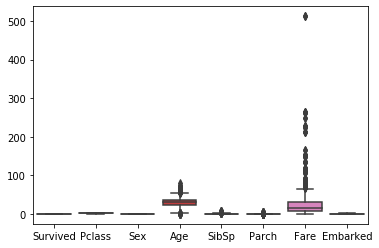

In [36]:
import seaborn as sns
import matplotlib as plt

dataf=data.drop(['Name','Ticket','PassengerId'],axis=1)

dataf["Sex"]=label.fit_transform(dataf["Sex"])
dataf
sns.boxplot(data=dataf)
print("l'echelle n'est pas efficace on doit standarlizer")

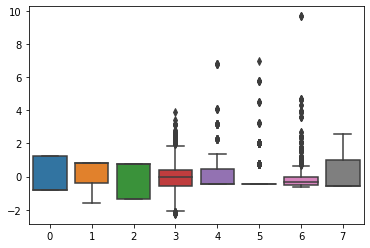

In [37]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
dataf=standard.fit_transform(dataf)
sns.boxplot(data=dataf)

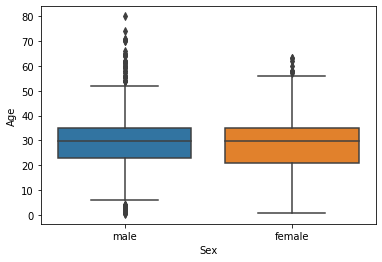

In [38]:
sns.boxplot(y='Age', x='Sex', 
                 data=df)


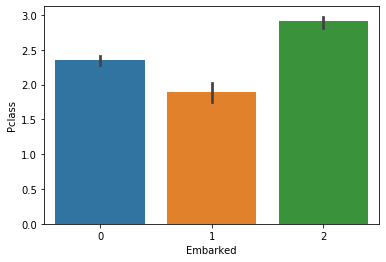

In [39]:
sns.barplot(y='Pclass', x='Embarked', 
                 data=df)

In [40]:
data[["Embarked","Pclass"]].groupby(["Embarked"],as_index=True).mean()

,Pclass
Embarked,
0,2.346749
1,1.886905
2,2.909091


C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


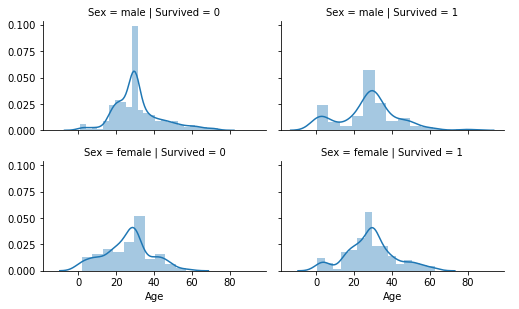

In [41]:
grid=sns.FacetGrid(data,row='Sex',col="Survived",size=2.2,aspect=1.6)

grid.map(sns.distplot,"Age")
grid.add_legend()
#print(data[data["Survived"]])

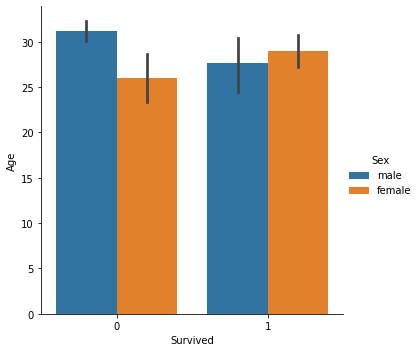

In [42]:
sns.catplot(y="Age", x="Survived", hue="Sex", kind="bar", data=data)

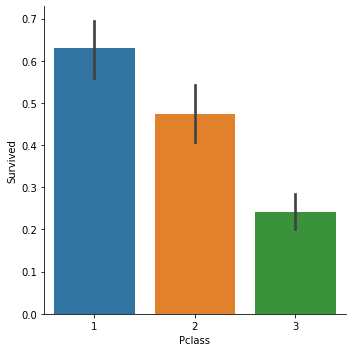

In [43]:
sns.catplot( y="Survived", x="Pclass", kind="bar", data=data)

In [44]:
data[["Survived","Pclass"]].groupby(["Pclass"],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


'S':0,'C':1,'Q':2


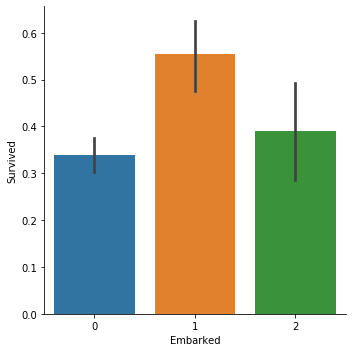

In [45]:
sns.catplot( y="Survived", x="Embarked", kind="bar", data=data)
print("'S':0,'C':1,'Q':2")

In [46]:
print("'S':0,'C':1,'Q':2")
data[["Embarked","Survived"]].groupby(["Embarked"],as_index=True).mean()


'S':0,'C':1,'Q':2


,Survived
Embarked,
0,0.339009
1,0.553571
2,0.389610


************interpretation********************** 
>>>plot coreleation map montre s'il ya une realtion entre les features  : 
 si le coefficent de corelation en valeur absolue est proche de 1 il ya une forte relation 
si le coefficient est negatif alors on dit que les fezutures evoluent inversement sinon meme sens


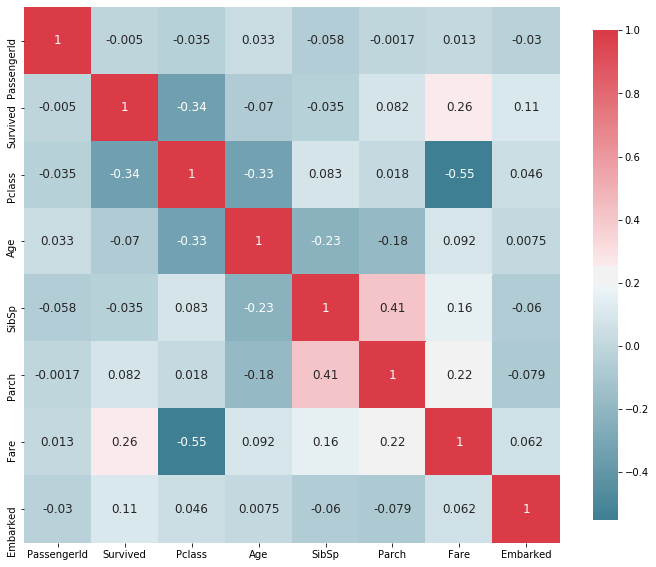

In [47]:
import matplotlib.pyplot as plt


def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(data)
print("************interpretation********************** ")
print(">>>plot coreleation map montre s'il ya une realtion entre les features  : \n si le coefficent de corelation en valeur absolue est proche de 1 il ya une forte relation \n"
"si le coefficient est negatif alors on dit que les fezutures evoluent inversement sinon meme sens")

               Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447


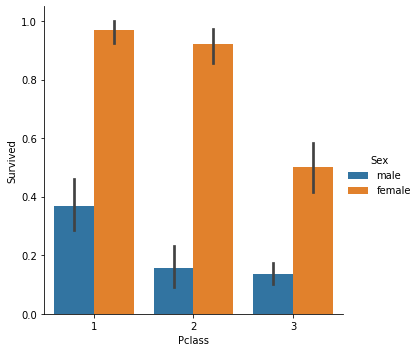

In [48]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=data)
print(data[["Sex","Survived","Pclass"]].groupby(["Pclass","Sex"],as_index=True).mean())

In [49]:
data[["Sex","Survived","Pclass"]].groupby(["Pclass","Sex"],as_index=True).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [50]:
dff=data[["Sex","Survived","Pclass","Embarked"]].groupby(["Pclass","Sex","Embarked"],as_index=True).mean()
print(" Survived=1 \n 'S':0,'C':1,'Q':2")

dff

 Survived=1 
 'S':0,'C':1,'Q':2


Survived
Pclass Sex    Embarked          
1      female 0         0.960000
              1         0.976744
              2         1.000000
       male   0         0.354430
              1         0.404762
              2         0.000000
2      female 0         0.910448
              1         1.000000
              2         1.000000
       male   0         0.154639
              1         0.200000
              2         0.000000
3      female 0         0.375000
              1         0.652174
              2         0.727273
       male   0         0.128302
              1         0.232558
              2         0.076923

In [51]:
data[["Parch","Survived"]].groupby(["Parch"],as_index=True).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [52]:
data[["SibSp","Survived"]].groupby(["SibSp"],as_index=True).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [53]:
titles=[]
for name in data["Name"]:
    x = name.find(", ")
    y=name.find('.')
    titles.append(name[x+2:y])
data=data.drop(['Name'],axis=1)
data["Title"]=titles
#data['Title']=data['Title']=data['Name'].str.extract(' ([A-Za-z]+)\.') 
data



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,male,28.000000,0,0,248740,13.0000,0,Mr
1,76,0,3,male,25.000000,0,0,348123,7.6500,0,Mr
2,641,0,3,male,20.000000,0,0,350050,7.8542,0,Mr
3,568,0,3,female,29.000000,0,4,349909,21.0750,0,Mrs
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,237736,30.0708,1,Mrs
887,61,0,3,male,22.000000,0,0,2669,7.2292,1,Mr
888,535,0,3,female,30.000000,0,0,315084,8.6625,0,Miss
889,102,0,3,male,29.699118,0,0,349215,7.8958,0,Mr


In [54]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":       "Officer",

                    "Rev":        "Officer",

                    "Jonkheer" :   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"}

data['Title']= data['Title'].map(Title_Dictionary) 

  

In [55]:
data["Title"].value_counts()



Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

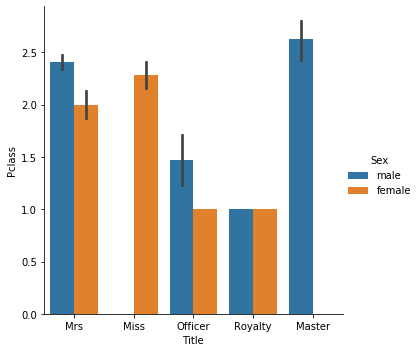

In [56]:
sns.catplot(x="Title", y="Pclass", hue="Sex", kind="bar", data=data)

In [57]:
data[["Title","Pclass"]].groupby(["Title"],as_index=True,observed=True).mean()

,Pclass
Title,
Master,2.625000
Miss,2.286486
Mrs,2.329705
Officer,1.444444
Royalty,1.000000


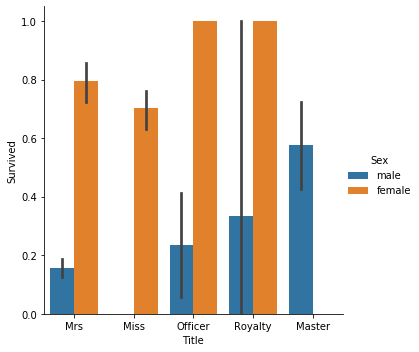

In [58]:
sns.catplot(x="Title", y="Survived", hue="Sex", kind="bar", data=data)

In [59]:
data[["Title","Survived"]].groupby(["Title"],as_index=True).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mrs,0.281493
Officer,0.277778
Royalty,0.600000


'S':0,'C':1,'Q':2


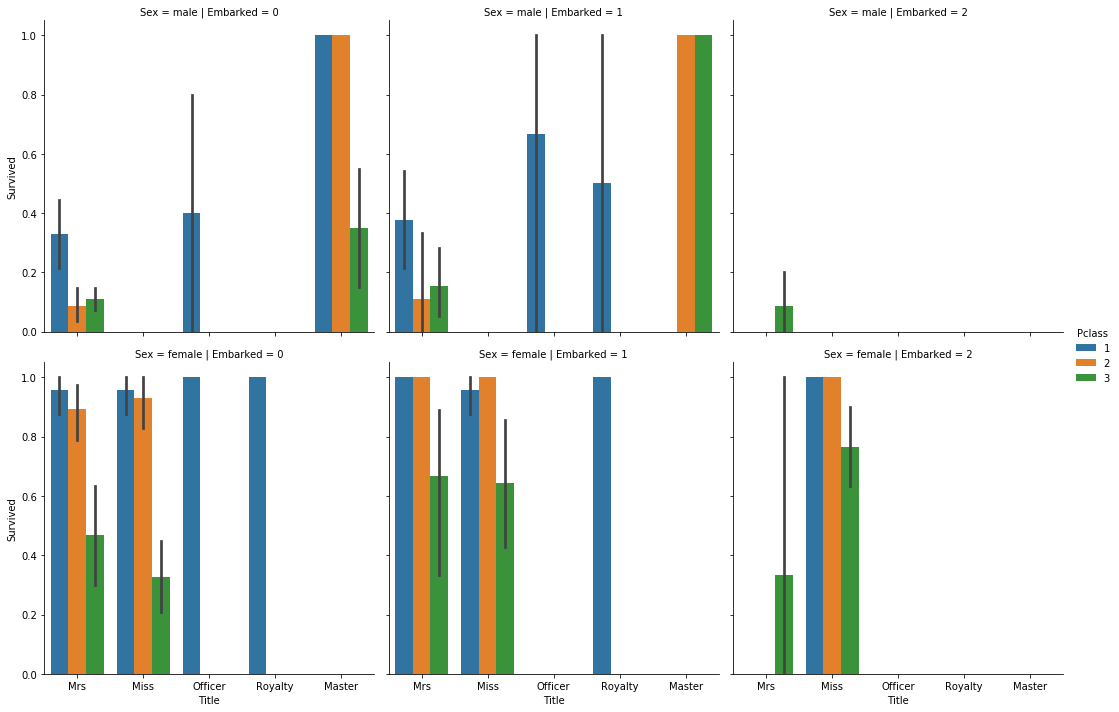

In [60]:
sns.catplot(x="Title", y="Survived",col="Embarked",hue="Pclass",row="Sex", kind="bar", data=data)
print("'S':0,'C':1,'Q':2")

In [61]:
print("'S':0,'C':1,'Q':2")

data[["Sex","Survived","Pclass","Embarked","Title"]].groupby(["Title","Pclass","Sex","Embarked"],as_index=True).mean()


'S':0,'C':1,'Q':2


Survived
Title   Pclass Sex    Embarked          
Master  1      male   0         1.000000
        2      male   0         1.000000
                      1         1.000000
        3      male   0         0.350000
                      1         1.000000
                      2         0.000000
Miss    1      female 0         0.958333
                      1         0.958333
                      2         1.000000
        2      female 0         0.931034
                      1         1.000000
                      2         1.000000
        3      female 0         0.327586
                      1         0.642857
                      2         0.766667
Mrs     1      female 0         0.958333
                      1         1.000000
               male   0         0.328571
                      1         0.378378
        2      female 0         0.894737
                      1         1.000000
               male   0         0.085366
                      1         0.111111
        3      female 0         0.466667
                      1         0.666667
                      2         0.333333
               male   0         0.110204
                      1         0.153846
                      2         0.085714
Officer 1      female 0         1.000000
               male   0         0.400000
                      1         0.666667
                      2         0.000000
        2      male   0         0.000000
                      2         0.000000
Royalty 1      female 0         1.000000
                      1         1.000000
               male   0         0.000000
                      1         0.500000

In [62]:
data["family_size"]=data["SibSp"]+data["Parch"]


In [63]:
d11=data[["family_size","Survived"]].groupby(["family_size"],as_index=True).mean()
d11

,Survived
family_size,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


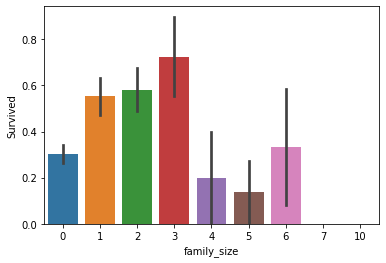

In [64]:
sns.barplot(x="family_size", y="Survived", data=data)

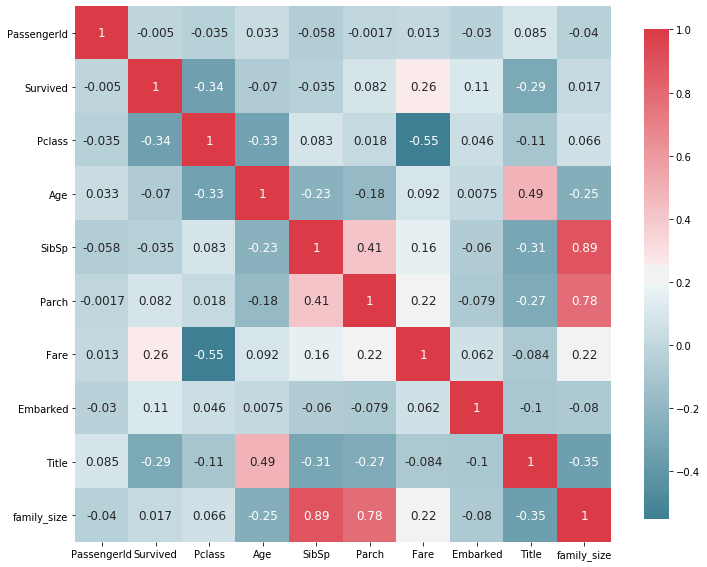

In [65]:
dataf=data
dataf["Title"]=label.fit_transform(dataf["Title"])
plot_correlation_map(data)


In [66]:
print("corellation map montre que le coefficient de corelation entre title et survived n,'set pa tres proche de 1 alors qu'on a remarqué l'inverse \n >>la methode de corellation n'est toujours efficace?")

corellation map montre que le coefficient de corelation entre title et survived n,'set pa tres proche de 1 alors qu'on a remarqué l'inverse 
 >>la methode de corellation n'est toujours efficace?
